### Decision Trees using the Titanic Dataset

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

### Load the Dataset

In [32]:
# Load the dataset
df = pd.read_csv(r'D:\lums\work stuff\notebooks\Week 2\train.csv')

# print(df.describe())
# print(df.info())
df = df.drop(['PassengerId', 'Cabin'], axis=1)

print(df.head())

   Survived  Pclass  ...     Fare Embarked
0         0       3  ...   7.2500        S
1         1       1  ...  71.2833        C
2         1       3  ...   7.9250        S
3         1       1  ...  53.1000        S
4         0       3  ...   8.0500        S

[5 rows x 10 columns]


In [33]:
# Fill missing values
print(df.isnull().sum())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'male' : 0, 'female' : 1})
df = pd.get_dummies(df, columns=['Embarked'])

print(df.head())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64
   Survived  Pclass  ... Embarked_Q  Embarked_S
0         0       3  ...      False        True
1         1       1  ...      False       False
2         1       3  ...      False        True
3         1       1  ...      False        True
4         0       3  ...      False        True

[5 rows x 12 columns]


### Visualising the Dataset 

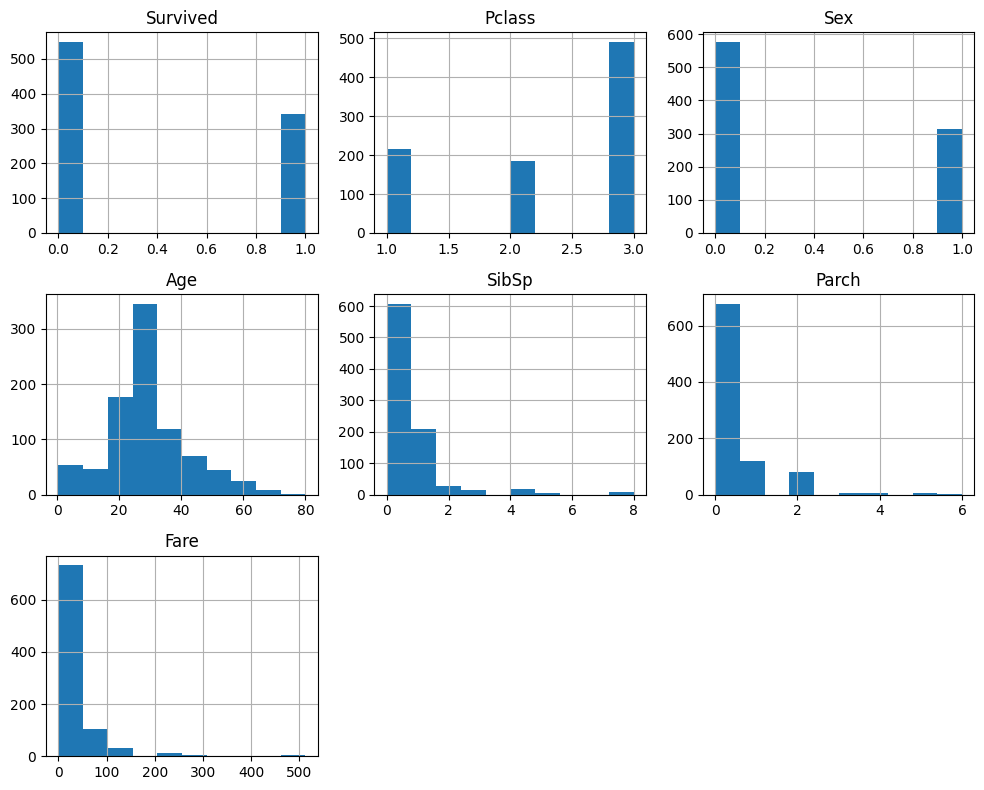

In [34]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


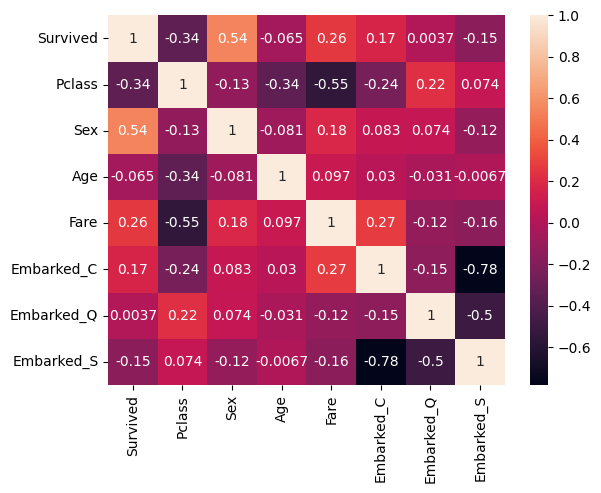

Survived      1.000000
Sex           0.543351
Fare          0.257307
Embarked_C    0.168240
Embarked_Q    0.003650
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Name: Survived, dtype: float64


In [ ]:
df = df.drop(['Name', 'Ticket', 'Parch', 'SibSp'], axis=1)
sns.heatmap(df.corr(), annot=True)
plt.show()

correlations = df.corr()['Survived'].sort_values(ascending=False)
print(correlations)


### Split the data 

In [36]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X)

     Pclass  Sex   Age     Fare  Embarked_C  Embarked_Q  Embarked_S
0         3    0  22.0   7.2500       False       False        True
1         1    1  38.0  71.2833        True       False       False
2         3    1  26.0   7.9250       False       False        True
3         1    1  35.0  53.1000       False       False        True
4         3    0  35.0   8.0500       False       False        True
..      ...  ...   ...      ...         ...         ...         ...
886       2    0  27.0  13.0000       False       False        True
887       1    1  19.0  30.0000       False       False        True
888       3    1  28.0  23.4500       False       False        True
889       1    0  26.0  30.0000        True       False       False
890       3    0  32.0   7.7500       False        True       False

[891 rows x 7 columns]


### Training the Model

### Pipeline

In [38]:
# Decision Tree pipeline (no scaling needed)
dt_pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

# kNN pipeline (scaling recommended)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# Naive Bayes pipeline (scaling recommended)
nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GaussianNB())
])


### Evaluation

In [39]:
pipelines = {
    "Decision Tree": dt_pipeline,
    "kNN": knn_pipeline,
    "Naive Bayes": nb_pipeline
}
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    # cross validation
    #gridsearch
    # feature engineering
    # hyperparameter tuning


Decision Tree Results:
Accuracy: 0.8268156424581006
Precision: 0.7878787878787878
Recall: 0.7536231884057971
F1 Score: 0.7703703703703704

kNN Results:
Accuracy: 0.8156424581005587
Precision: 0.8214285714285714
Recall: 0.6666666666666666
F1 Score: 0.736

Naive Bayes Results:
Accuracy: 0.7653631284916201
Precision: 0.7368421052631579
Recall: 0.6086956521739131
F1 Score: 0.6666666666666666


In [40]:
for name, pipe in pipelines.items():
    scores = cross_val_score(pipe, X, y, cv=5)
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")

Decision Tree Cross-Validation Accuracy: 0.785 (+/- 0.024)
kNN Cross-Validation Accuracy: 0.801 (+/- 0.010)
Naive Bayes Cross-Validation Accuracy: 0.775 (+/- 0.051)


In [41]:
param_grid = {
    'clf__max_depth': [3, 5, 7, None],
    'clf__min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(dt_pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Decision Tree Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Decision Tree Params: {'clf__max_depth': 5, 'clf__min_samples_split': 5}
Best CV Score: 0.8202994188909682
